# Pymaceuticals Inc.
---

### Analysis

- In mice, if Capomulin is treatment, it can be correlated, with a coefficient of .84, that the more the mouse weighs, the average tumor size will also positively increase.

- In Mouse b128, treatment of Capomulin reduced the size of the Tumor Volume from ~45.5 mm3 to as low as 38 mm3.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" #249 rows
study_results_path = "data/Study_results.csv" #1893 rows

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results,mouse_metadata,how= "outer", on= "Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = mouse_df[mouse_df.duplicated(subset=["Mouse ID","Timepoint"])]
dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_info = mouse_df[mouse_df['Mouse ID']== 'g989']
dupe_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']
clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg_df = clean_mouse.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_v_mean = drug_reg_df['Tumor Volume (mm3)'].mean()

tumor_v_median = drug_reg_df['Tumor Volume (mm3)'].median()

tumor_v_var = drug_reg_df['Tumor Volume (mm3)'].var()

tumor_v_stdev = drug_reg_df['Tumor Volume (mm3)'].std()

tumor_v_stderr = drug_reg_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_reg_summ = pd.DataFrame({'Mean Tumor Volume': tumor_v_mean, 'Median Tumor Volume': tumor_v_median,\
                              'Tumor Volume Variance':tumor_v_var, 'Tumor Volume Std. Dev.': tumor_v_stdev,\
                                'Tumor Volume Std. Err': tumor_v_stderr})

drug_reg_summ



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_summ2 = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)']\
    .agg(['mean','median','var','std','sem'])

drug_reg_summ2 = drug_reg_summ2.style.set_caption('Tumor Volume (mm3)')
drug_reg_summ2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

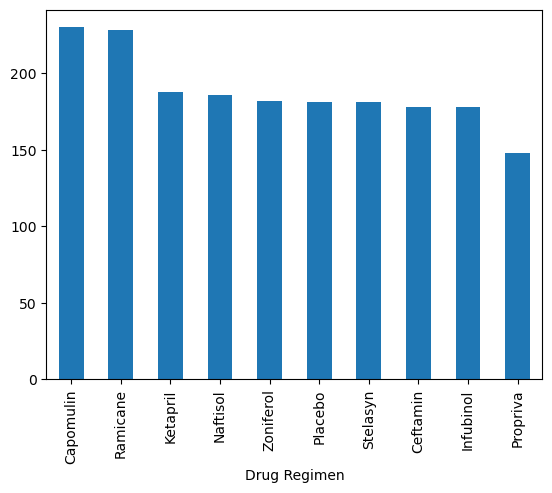

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_timepoint = clean_mouse[['Drug Regimen','Timepoint']]

drug_and_timepoint = drug_and_timepoint.groupby('Drug Regimen').count()

drug_and_timepoint = drug_and_timepoint['Timepoint'].sort_values(ascending=False)

drug_and_timepoint.plot(kind='bar')

plt.show()

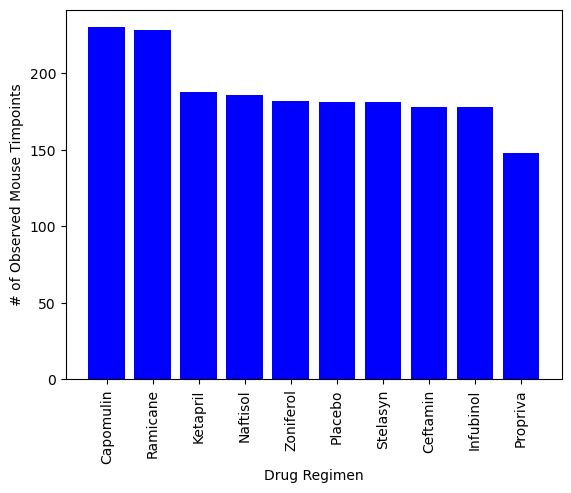

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_and_timepoint))
tick_loc = [value for value in x_axis]

drug_and_timepoint.reset_index()

plt.bar(x_axis, drug_and_timepoint, color = 'b', align = 'center')
plt.xticks(x_axis, labels=drug_and_timepoint.keys(), rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpoints')
plt.show()

<Axes: ylabel='Sex'>

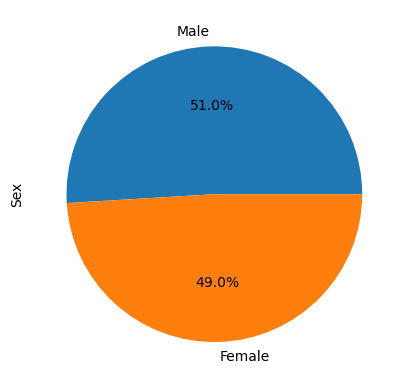

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse['Sex'].value_counts()

mouse_sex.plot.pie(y=mouse_sex[1], autopct = '%1.1f%%')


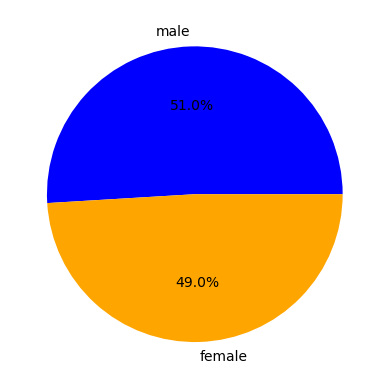

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = [mouse_sex[0],mouse_sex[1]]
labels = ['male','female']
colors = ['blue','orange']

plt.pie(size,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_tumor = pd.merge(last_timepoint,clean_mouse,how = 'left',on = ['Mouse ID','Timepoint'])
timepoint_tumor = timepoint_tumor.loc[:,['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
timepoint_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_v_plot_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for drug in drugs:
    list = timepoint_tumor.loc[timepoint_tumor['Drug Regimen'] == drug]
    quartiles = list['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{drug}'s potential outliers:")
    for size in list['Tumor Volume (mm3)']:
        if int(size) < lower_bound or size > upper_bound:
            print(size) 

Capomulin's potential outliers:
Ramicane's potential outliers:
Infubinol's potential outliers:
36.3213458
Ceftamin's potential outliers:


In [45]:
capomulin = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

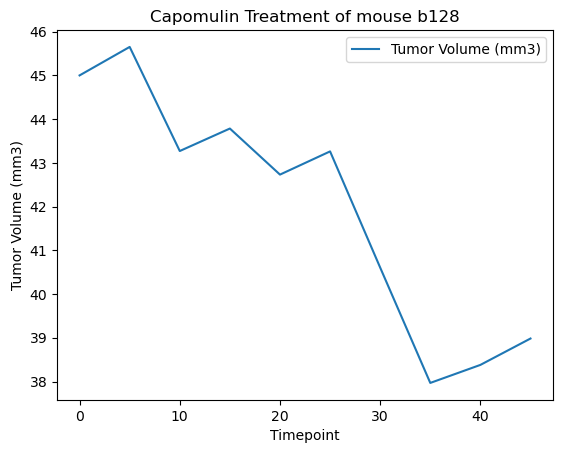

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_line = clean_mouse.loc[clean_mouse['Mouse ID'] == 'b128']
tumor_line.plot(x = 'Timepoint', y= 'Tumor Volume (mm3)', kind = 'line')
plt.title('Capomulin Treatment of mouse b128')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

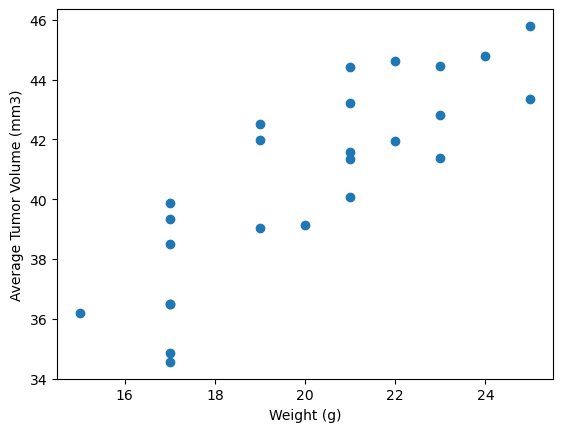

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capomulin = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].agg('mean')

weight_capomulin = capomulin.groupby('Mouse ID')['Weight (g)'].agg('mean')


plt.scatter(weight_capomulin,avg_capomulin)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Correlation coefficient is :0.8419363424694722


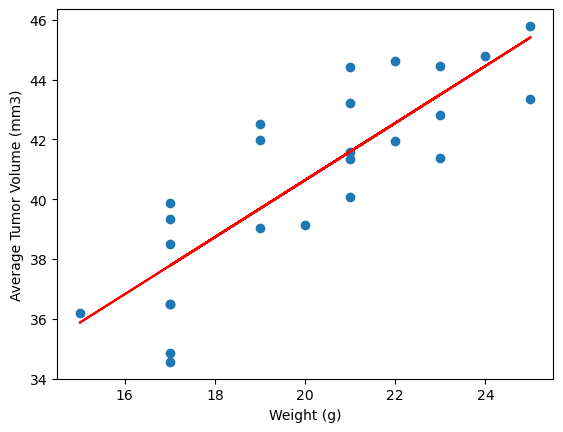

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire ramicane regimen
slope, intercept, r_value, p_value, std_err = st.linregress(weight_capomulin,avg_capomulin)
line = slope * np.array(weight_capomulin) + intercept
plt.scatter(weight_capomulin,avg_capomulin)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(weight_capomulin,line, color = 'r' )

print(f"Correlation coefficient is :{np.corrcoef(weight_capomulin,avg_capomulin)[0,1]}")